In [21]:
import pandas as pd
import numpy as np
import utils
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [6]:
trm_counts = pd.read_csv('data/tcell/trm_counts.tsv', sep='\t', header=None)
trm_counts = trm_counts.T
arr = np.array(trm_counts)
data=arr[1:,1:]
data = data.astype(float)
data = np.log2(data+1)

/var/folders/p0/nb5t36rs6p5_2b9yzyw6y8hw0000gn/T/ipykernel_3482/3514914966.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

In [7]:
cluster_metadata = pd.read_csv('data/tcell/cluster.txt', sep='\t')
cluster_metadata_arr = np.array(cluster_metadata)
labels = cluster_metadata_arr[1:,3]

In [8]:
combined = [(labels[i], data[i]) for i in range(len(labels))]
combined.sort(key=lambda x: x[0])

cluster_sizes = []
first_clsuter = combined[0][0]
cluster_size = 0
for label, _ in combined:
    if label == first_clsuter:
        cluster_size += 1
    else:
        cluster_sizes.append(cluster_size)
        cluster_size = 1
        first_clsuter = label
cluster_sizes.append(cluster_size)

In [16]:
red_pca = PCA(n_components=1000)
data_pre = red_pca.fit_transform(data)
D_pre = utils.get_distance_matrix(data_pre)

In [18]:
pca = PCA(n_components=10)
data_post = pca.fit_transform(data)
D_post = utils.get_distance_matrix(data_post)

In [19]:
C = D_pre / D_post
avg_inter_compress, avg_intra_compress = utils.get_average_compression(C, cluster_sizes, len(cluster_sizes))
avg_inter_compress, avg_intra_compress

/var/folders/p0/nb5t36rs6p5_2b9yzyw6y8hw0000gn/T/ipykernel_3482/84757747.py:1: RuntimeWarning: invalid value encountered in divide
  C = D_pre / D_post


(array([2.40965367, 2.36185518, 2.36769039, 2.36410529, 2.3675831 ,
        2.37456442, 2.16862778, 2.11804195, 2.14353746, 2.2233097 ]),
 array([2.51257721, 2.47473946, 2.44274188, 2.38934279, 2.41358186,
        2.44938281, 2.42402213, 2.73952751, 2.59426602, 2.6095949 ]))

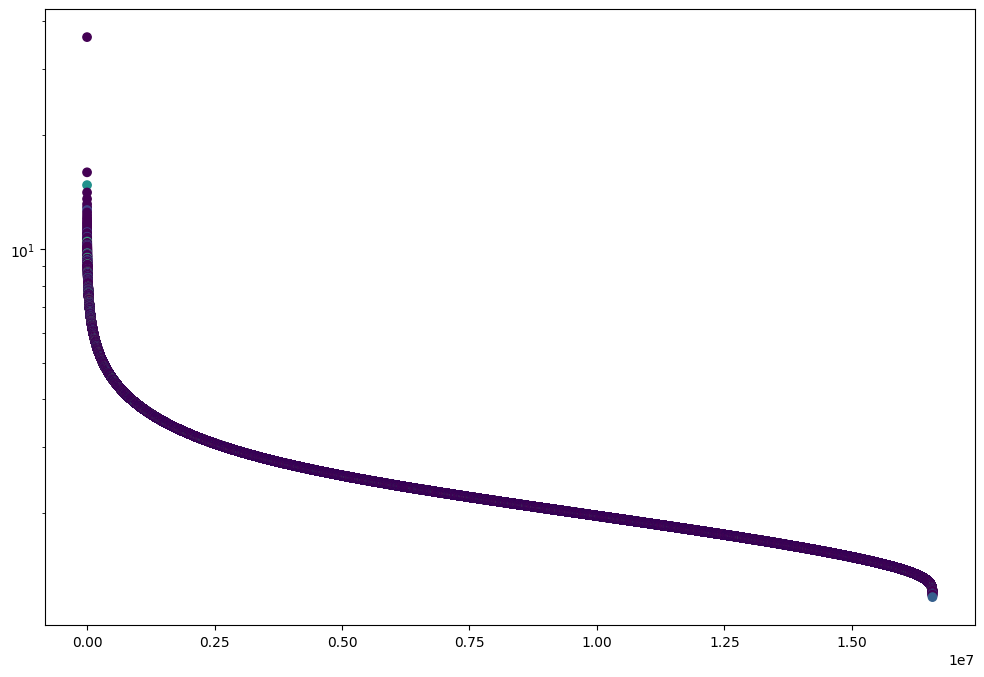

In [22]:
cgraph_tcell = utils.compression_grouping(C, cluster_sizes)[::-1]
step_size = 100
index = list(range(0, len(cgraph_tcell), step_size))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.scatter(index, cgraph_tcell[index, 0], c=cgraph_tcell[index, 1])
# Set vertical scale to be logarithmic
plt.yscale('log')
plt.show()

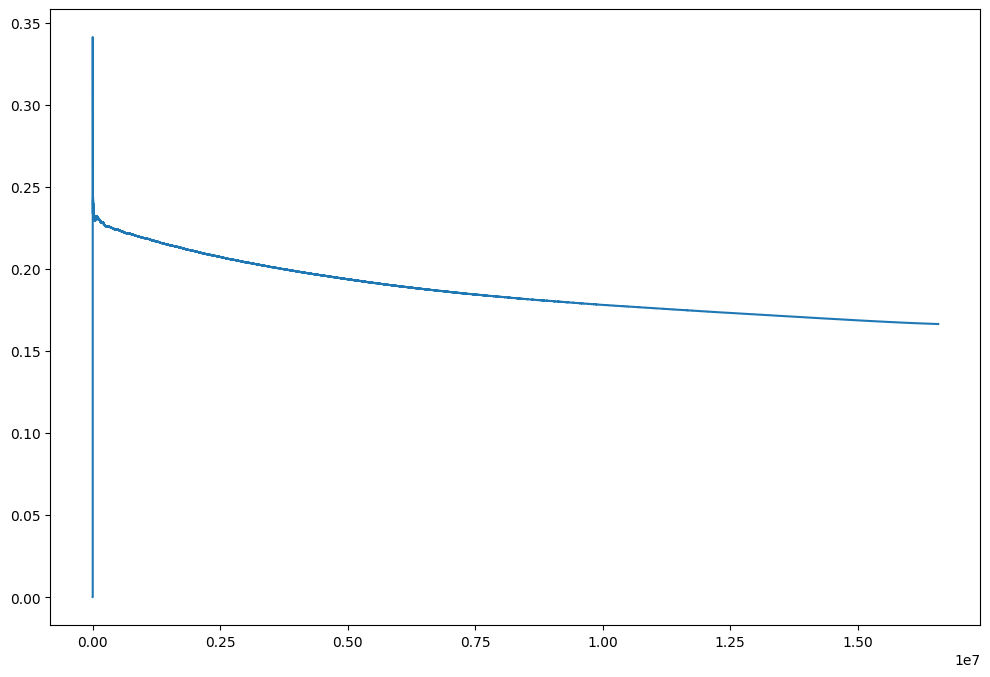

In [23]:
curr = 0
prop = []
for i in range(len(cgraph_tcell)): 
    if cgraph_tcell[i, 1] != 0: 
        curr += 1
    prop.append(curr / (i + 1))
plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.plot(range(len(prop)), prop)
# Set vertical scale to be logarithmic
# plt.yscale('log')
plt.show()